# 비지도 학습: Clustering - K-Means

- 군집(Clustering)은 비지도 학습의 한 종류로 비슷한 샘플을 모으는 방식이다.

- K-Means는 군집화에서 가장 일반적일 알고리즘으로 가장 많이 사용되는 기법이다.

	- 군집 중심(centroid)이라는 임의의 지점을 선택해서 해당 중심에 가장 가까운 포인트들을 선택하는 군집화이다.
	- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 떨어질 수 있다.

</br>

## 1️⃣ Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
%matplotlib inline

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
# (cm) 잘라내기

cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 편의상 2개의 특성만

feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### --▶ Clustering

- __KMeans__ 군집화

	- `n_clusters` : 군집화할 개수, 즉 군집 중심점의 개수

	- `init` : 초기 군집 중심점의 좌표를 설정하는 방식 결정
	
	- `max_iter` : 최대 반복 횟수, 모든 데이터의 중심점 이동이 없으면 종료 <br></br>

- 결과 라벨은 군집화된 그룹명에 해당한다. 지도학습의 정답 데이터인 라벨과는 다른 개념이다.

In [7]:
model = KMeans(n_clusters=3, n_init='auto')
model.fit(feature)

c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [8]:
model.labels_ #--> 군집명

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
model.cluster_centers_ #--> 군집의 중심값

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

### --▶ Cluster 시각화

In [10]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


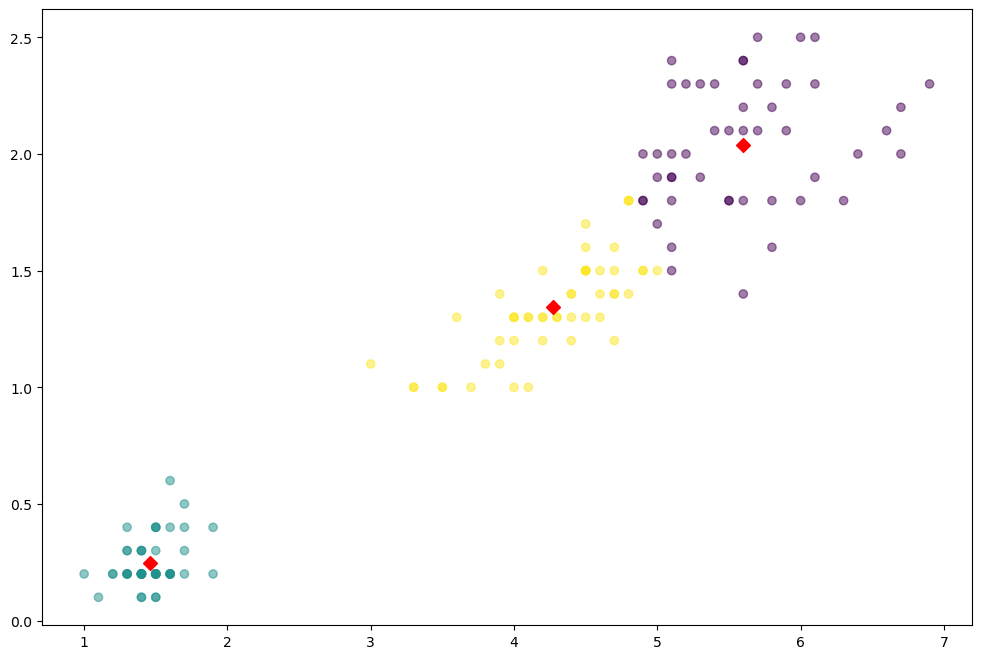

In [14]:
centers = pd.DataFrame(model.cluster_centers_, columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12,8))
plt.scatter(feature['petal length'], feature['petal width'], c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

</br>

## 2️⃣ make_blobs

- 군집화를 연습할 수 있는 데이터 생성기이다.

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [16]:
# 데이터 정리

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


### --▶ Clustering

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init='auto', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels
cluster_df.head()

c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


### --▶ Result 도식화

In [20]:
centers = kmeans.cluster_centers_
print(centers)

unique_labels = np.unique(cluster_labels)
print(unique_labels)

[[ 0.990103    4.44666506]
 [-1.70636483  2.92759224]
 [ 1.95763312  0.81041752]]
[0 1 2]


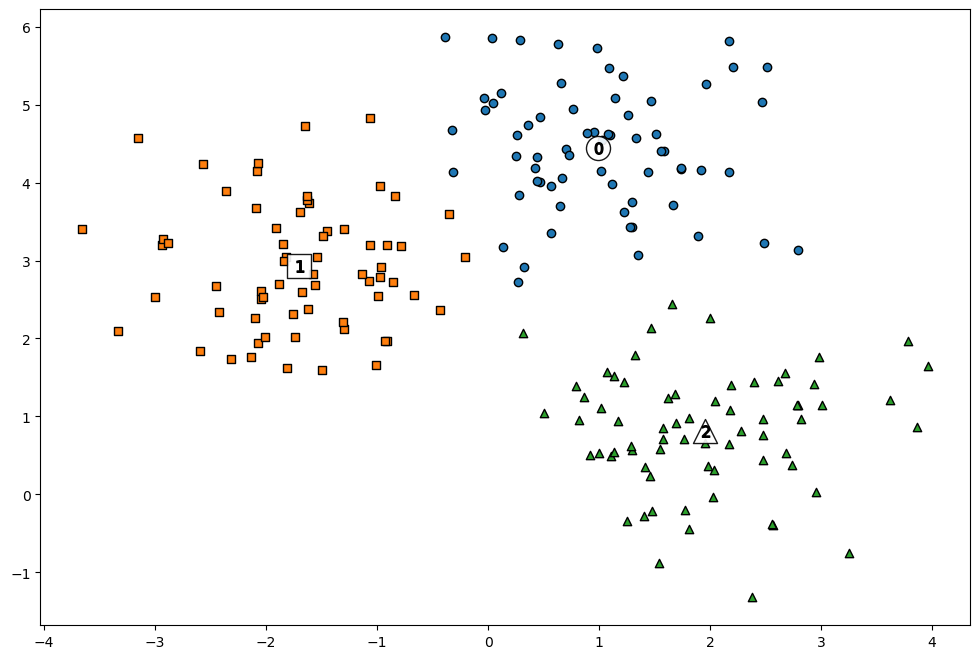

In [32]:
markers = ['o','s','^']#,'P','D','H','x']

plt.figure(figsize=(12,8))

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(
		x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label]
	)
    
    plt.scatter(
		x=center_x_y[0], y=center_x_y[1], s=300, color='white', alpha=0.9, edgecolors='k', marker=markers[label]
	)
    plt.scatter(
		x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolors='k', marker='$%d$' % label		
	)

plt.show()

In [33]:
# 결과 확인

print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64


## ⏹ 군집 평가 : 실루엣 분석

In [34]:
iris_df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
# 군집화

kmeans = KMeans(n_clusters=3, init='k-means++', n_init='auto', max_iter=300, random_state=0).fit(iris_df)
kmeans.labels_

c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [36]:
# 군집 결과 정리

iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### 📍 __silhouette_score__

In [37]:
# 군집 결과 평가를 위한 전처리 작업

from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value', avg_value)
print('silhouette_samples() return 값의 shape', score_values.shape)

avg_value 0.5511916046195919
silhouette_samples() return 값의 shape (150,)


In [38]:
score_values

array([ 0.85258191,  0.8149163 ,  0.82879659,  0.80435199,  0.84891774,
        0.7477614 ,  0.82109757,  0.8534934 ,  0.75127806,  0.82475199,
        0.80269525,  0.83540396,  0.80996716,  0.74535637,  0.70224038,
        0.64338856,  0.77526857,  0.85063272,  0.70636742,  0.81987458,
        0.78364122,  0.82546665,  0.79244412,  0.79345251,  0.77426479,
        0.79799564,  0.83296108,  0.84162136,  0.84325046,  0.81723402,
        0.8145665 ,  0.79849826,  0.76227879,  0.72184605,  0.82822866,
        0.83179477,  0.79374024,  0.84148042,  0.76779363,  0.84992603,
        0.84902387,  0.63767419,  0.78589195,  0.79963167,  0.74629437,
        0.80915172,  0.81295565,  0.81844011,  0.81783314,  0.85168255,
       -0.02672203,  0.36827154,  0.08489767,  0.59610609,  0.35669884,
        0.59416206,  0.27019063,  0.27245453,  0.32755642,  0.58167084,
        0.38107057,  0.58665651,  0.55085685,  0.47851679,  0.56757079,
        0.30479553,  0.5596951 ,  0.61137194,  0.46029717,  0.61

### ◾ __yellowbrick__

- yellowbrick을 설치하고 실루엣 플랏의 결과를 확인한다.

In [39]:
#!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00


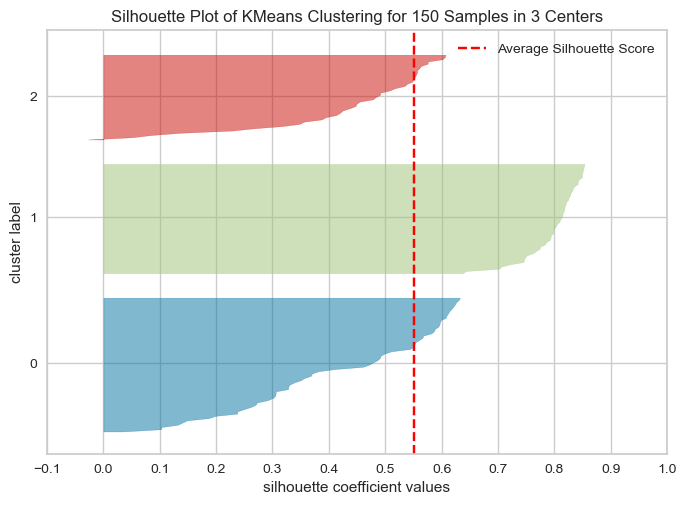

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, n_init='auto',
                                      random_state=0))

In [46]:
from yellowbrick.cluster import silhouette_visualizer
from warnings import filterwarnings
filterwarnings('ignore', category=UserWarning)

silhouette_visualizer(kmeans, iris_df.iloc[:, :4], colors='yellowbrick') # iris.data

</br>

## 3️⃣ Image Segmentation

> 군집을 이용한 이미지 분할

</br>

### 🎫 ladybug.png

In [52]:
from matplotlib.image import imread

image = imread("D:\zbDS\Project\Part7_ML\dataset\ladybug.png")
image.shape

(417, 626, 3)

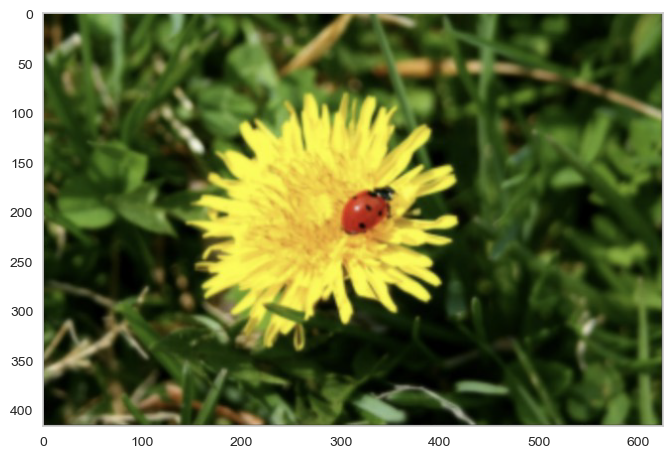

In [53]:
plt.imshow(image)
plt.grid(False)

### --▶ Clustering

- 색상별로 군집화한다.

In [55]:
X = image.reshape(-1, 3)
X, X.shape

(array([[0.03921569, 0.04313726, 0.01568628],
        [0.04705882, 0.05098039, 0.02352941],
        [0.0627451 , 0.07058824, 0.02745098],
        ...,
        [0.20784314, 0.22745098, 0.1764706 ],
        [0.18431373, 0.19607843, 0.15686275],
        [0.15294118, 0.16470589, 0.12941177]], dtype=float32),
 (261042, 3))

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, n_init='auto', random_state=13).fit(X)
cluster, cnt = np.unique(kmeans.labels_, return_counts=True)
print(list(zip(cluster, cnt)))

[(0, 47680), (1, 32292), (2, 1465), (3, 53754), (4, 12899), (5, 35404), (6, 24895), (7, 52653)]


In [61]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img, segmented_img.shape

(array([[0.0432961 , 0.0856753 , 0.01330733],
        [0.0432961 , 0.0856753 , 0.01330733],
        [0.0432961 , 0.0856753 , 0.01330733],
        ...,
        [0.21535088, 0.29680037, 0.09646852],
        [0.21535088, 0.29680037, 0.09646852],
        [0.12574679, 0.19396967, 0.04711178]], dtype=float32),
 (261042, 3))

### --▶ Inversion

- 대표 색상 8개를 추출한 후 그 8개의 색상을 이용해 다시 원본 이미지의 형태로 환원한다.

- 그룹화한 색상 8개의 중앙값으로 다시 이미지를 시각화해본다.

In [64]:
segmented_img = segmented_img.reshape(image.shape) #--> image.shape (417, 626, 3)
segmented_img, segmented_img.shape

(array([[[0.0432961 , 0.0856753 , 0.01330733],
         [0.0432961 , 0.0856753 , 0.01330733],
         [0.0432961 , 0.0856753 , 0.01330733],
         ...,
         [0.31549525, 0.40327284, 0.15753773],
         [0.21535088, 0.29680037, 0.09646852],
         [0.21535088, 0.29680037, 0.09646852]],
 
        [[0.0432961 , 0.0856753 , 0.01330733],
         [0.0432961 , 0.0856753 , 0.01330733],
         [0.0432961 , 0.0856753 , 0.01330733],
         ...,
         [0.31549525, 0.40327284, 0.15753773],
         [0.31549525, 0.40327284, 0.15753773],
         [0.21535088, 0.29680037, 0.09646852]],
 
        [[0.0432961 , 0.0856753 , 0.01330733],
         [0.0432961 , 0.0856753 , 0.01330733],
         [0.0432961 , 0.0856753 , 0.01330733],
         ...,
         [0.31549525, 0.40327284, 0.15753773],
         [0.31549525, 0.40327284, 0.15753773],
         [0.21535088, 0.29680037, 0.09646852]],
 
        ...,
 
        [[0.0432961 , 0.0856753 , 0.01330733],
         [0.0432961 , 0.0856753 , 0.01330

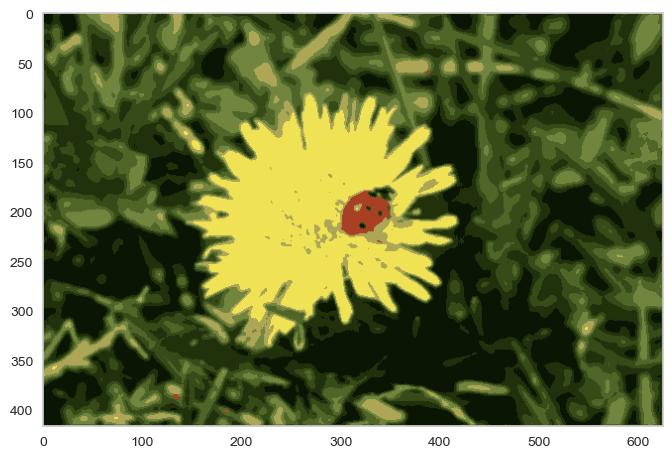

In [66]:
plt.imshow(segmented_img) #--> 색상의 종류가 단순해지면서 화질이 떨어지게 된다. (8개의 색으로만 표현)
plt.grid(False)
plt.show()

### ◾ 여러 개의 군집을 비교

In [68]:
segmented_imgs = []
n_colors = [10, 8, 6, 4, 2]

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=13).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

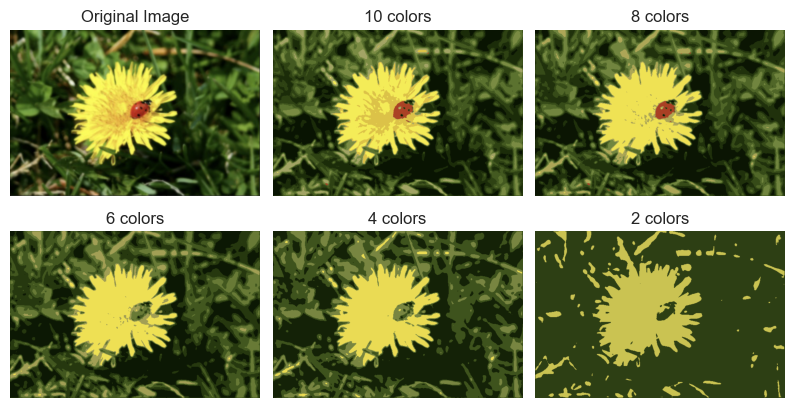

In [69]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))
    plt.axis('off')

plt.show()

</br>

### 🎫 MNIST dataset

In [73]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

### --▶ Logistic Regression

- 다중 분류라서 로지스틱 회귀를 사용한다.

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=13)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9622222222222222

### --▶ K-Means

- 전처리 느낌으로 KMeans를 통과시켜 Features 개수를 줄여서 Logistic Regression을 다시 학습시켜 본다.

In [76]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
	('kmeans', KMeans(n_clusters=50, n_init='auto', random_state=27)),
	('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=27))
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9666666666666667

### --> GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))

grid_clf = GridSearchCV(pipeline, param_grid=param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init='auto',
                                               random_state=27)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=27))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [78]:
grid_clf.best_params_

{'kmeans__n_clusters': 84}

In [79]:
grid_clf.score(X_test, y_test)

0.9777777777777777